<img src="Images/HSP2new.png" />
This Jupyter Notebook Copyright 2017 by RESPEC, INC.  All rights reserved.

# Calleg TEST NOTEBOOK for HSP$^2$ 
# Developed for Windows Plaform

This Notebook will compare the results of running HSPF and HSP$^2$ for the basic hydrology (PWATER, IWATER, and HYDR) to confirm the proper calculations of HSP$^2$.  This notebook requires HSPF to be installed and currently runs WinHSPF Lite from BASINS install C:\BASINS41\models\HSPF\bin\WinHspfLt.exe. It is setup to run using the Calleguas example provided in the repo at 

### Required Python imports  and setup

In [9]:
import os
import site
site.addsitedir(os.getcwd().rsplit('\\',1)[0] + '\\')  # adds your path to the HSP2 software.

import shutil
import numpy as np
import pandas as pd
pd.options.display.max_rows    = 18
pd.options.display.max_columns = 10
pd.options.display.float_format = '{:.2f}'.format  # display 2 digits after the decimal point

import HSP2
import HSP2tools

import qgrid
# Tell qgrid to automatically render all DataFrames and Series as qgrids.
qgrid.enable()
# Disable automatic display so we can display DataFrames in the normal way
# qgrid.disable()

import matplotlib.pyplot as plt
%matplotlib inline

HSP2tools.reset_tutorial()    # make a new copy of the tutorial's data
HSP2tools.versions()          # display version information below

A Jupyter Widget

### Setup paths to the necessary datafiles
This assumes the calleg.uci and calleg.wdm files are located in the current working directory for this Notebook. This will create the binary output file, calleg.hbn, along with a number of other standard HSPF outputs.

In [10]:
wdmname = 'TutorialData/calleg.wdm'
uciname = 'TutorialData/calleg.uci'
hdfname = 'TutorialData/calleg.h5'
hbnname = 'TutorialData/calleg.hbn'

## Run HSPF

Using the Basins 4.1 WinHspfLt executable to run calleg.uci.

This assumes the calleg.uci and calleg.wdm files are located in the current working directory for this Notebook.  This will create the binary output file, calleg.hbn, along with a number of other standard HSPF outputs.

In [11]:
%time !C:\BASINS41\models\HSPF\bin\WinHspfLt.exe {uciname}

Wall time: 32.3 s


## Run HSP$^2$

This assumes the calleg.h5 file has been created. If not, the following lines can be used to create the HDF5 file (see Tutorial 4 for details.)

In [12]:
HSP2tools.makeH5()
HSP2tools.readUCI(uciname, hdfname)
HSP2tools.ReadWDM(wdmname, hdfname)

DONE
uciReader is Done
Processing WDM file TutorialData/calleg.wdm
/TIMESERIES/TS1169 H 1987-10-01T00:00:00 2002-10-01T00:00:00 131496 EVAP
/TIMESERIES/TS187 H 1987-09-30T00:00:00 2002-10-01T00:00:00 131520 PREC
/TIMESERIES/TS242 H 1987-10-01T00:00:00 2002-10-01T00:00:00 131496 PREC
/TIMESERIES/TS1171 H 1987-10-01T00:00:00 2002-10-01T00:00:00 131496 EVAP
/TIMESERIES/TS234 H 1987-09-30T00:00:00 2002-10-01T00:00:00 131520 PREC
/TIMESERIES/TS249 H 1987-09-30T00:00:00 2002-10-01T00:00:00 131520 PREC
/TIMESERIES/TS193 H 1987-10-01T00:00:00 2002-10-01T00:00:00 131496 PREC
/TIMESERIES/TS196 H 1987-10-01T00:00:00 2002-10-01T00:00:00 131496 PREC
/TIMESERIES/TS154 H 1987-09-30T00:00:00 2002-10-01T00:00:00 131520 PREC
/TIMESERIES/TS227 H 1987-10-01T00:00:00 2002-10-01T00:00:00 131496 PREC
/TIMESERIES/TS250 H 1987-10-01T00:00:00 2002-10-01T00:00:00 131496 PREC
/TIMESERIES/TS141 H 1987-09-30T00:00:00 2002-10-01T00:00:00 131520 PREC
/TIMESERIES/TS49 H 1987-10-01T00:00:00 2002-10-01T00:00:00 131496 P

Now run HSP$^2$ on the calleg watershed

In [13]:
%time HSP2.run(hdfname, saveall=True)

2018-01-06 08:26:33.16   Run Started for file TutorialData/calleg.h5
2018-01-06 08:26:33.22     Start 1993-10-01 00:00    Stop 2002-09-30 23:59
2018-01-06 08:26:35.24   Finished setup
2018-01-06 08:26:35.25      PERLND P011   DELT=60
2018-01-06 08:26:35.43      PERLND P012   DELT=60
2018-01-06 08:26:35.61      PERLND P013   DELT=60
2018-01-06 08:26:35.79      PERLND P014   DELT=60
2018-01-06 08:26:35.95      PERLND P015   DELT=60
2018-01-06 08:26:36.13      IMPLND I011   DELT=60
2018-01-06 08:26:36.19      PERLND P021   DELT=60
2018-01-06 08:26:36.35      PERLND P022   DELT=60
2018-01-06 08:26:36.52      PERLND P023   DELT=60
2018-01-06 08:26:36.69      PERLND P024   DELT=60
2018-01-06 08:26:36.85      PERLND P025   DELT=60
2018-01-06 08:26:37.02      IMPLND I021   DELT=60
2018-01-06 08:26:37.07      RCHRES R001   DELT=60
2018-01-06 08:26:37.47      PERLND P031   DELT=60
2018-01-06 08:26:37.65      PERLND P041   DELT=60
2018-01-06 08:26:37.84      PERLND P042   DELT=60
2018-01-06 08:26

2018-01-06 08:27:05.55      PERLND P222   DELT=60
2018-01-06 08:27:05.71      PERLND P224   DELT=60
2018-01-06 08:27:05.87      PERLND P225   DELT=60
2018-01-06 08:27:06.03      PERLND P226   DELT=60
2018-01-06 08:27:06.21      IMPLND I221   DELT=60
2018-01-06 08:27:06.27      PERLND P231   DELT=60
2018-01-06 08:27:06.43      PERLND P232   DELT=60
2018-01-06 08:27:06.60      PERLND P234   DELT=60
2018-01-06 08:27:06.78      PERLND P235   DELT=60
2018-01-06 08:27:06.94      IMPLND I231   DELT=60
2018-01-06 08:27:06.99      PERLND P241   DELT=60
2018-01-06 08:27:07.16      PERLND P242   DELT=60
2018-01-06 08:27:07.35      PERLND P243   DELT=60
2018-01-06 08:27:07.51      PERLND P244   DELT=60
2018-01-06 08:27:07.66      PERLND P245   DELT=60
2018-01-06 08:27:07.84      IMPLND I241   DELT=60
2018-01-06 08:27:07.89      PERLND P251   DELT=60
2018-01-06 08:27:08.06      PERLND P252   DELT=60
2018-01-06 08:27:08.23      PERLND P253   DELT=60
2018-01-06 08:27:08.40      PERLND P254   DELT=60


## Determine Available Calculated Results

Now use Tim Cera's hspfbintoolbox.py to determine the available timeseries created by HSPF and stored into the HBN binary file.

In [14]:
!ptrepack TutorialData\calleg.h5 TutorialData\packedCalleg.h5

In [15]:
import hspfbintoolbox

In [16]:
keys = sorted(hspfbintoolbox.catalog(hbnname).keys())
df_keys = pd.DataFrame(data=keys)
df_keys

A Jupyter Widget

## Automate checking IMPLNDs for SURO

Extract the keys (calculated above) for IMPLD + IWATER + SURO. For each key, compute several columns.  The final column shows the percent difference of the sum of the SURO for the entire run between HSPF and HSP2.

In [17]:
segments = []
for operation,segment,optype,variable,freq in keys:
    if str(operation)=='IMPLND' and str(optype)=='IWATER' and str(variable)=='SURO' and freq==4:
        segments.append(str(segment))

dfimplnd = pd.DataFrame()
for seg in segments:  
    path = 'IMPLND,' + seg + ',IWATER,SURO'
    hspf, units_flag = HSP2tools.get_HBNdata(hbnname, path)
    hspf = hspf['M'].values

    path = '/RESULTS/IMPLND' + '_I' + '{:0>3s}'.format(str(seg)) + '/IWATER'
    hsp2 = pd.read_hdf(hdfname, path)['SURO']
    hsp2 = hsp2.resample('M').sum().values
    
    dfimplnd.at[seg, 'Max Diff'] =  (hspf - hsp2).max()
    dfimplnd.at[seg, 'Sum of HSPF'] = hspf.sum()
    dfimplnd.at[seg, 'Sum of HSP2'] = hsp2.sum()
    dfimplnd.at[seg, '%diff of Sum'] = 100.0 * (hspf.sum() - hsp2.sum()) / hspf.sum()
    dfimplnd.at[seg, 'abs(%diff of Sum)'] = 100.0 * abs(hspf.sum() - hsp2.sum()) / hspf.sum()

dfimplnd = dfimplnd.sort_values(by=['abs(%diff of Sum)'])
dfimplnd

A Jupyter Widget

Look at the statistics for the percent difference column

In [18]:
dfimplnd['%diff of Sum'].describe()

A Jupyter Widget

### Now look at the worst case
The IMPLND segments are ordered in assending "abs(%diff of Sum)", so the last entry is the worst case (by this measure.)

In [19]:
ils = dfimplnd.index[-1]
print 'WORST IMPLND SEGMENT IS', ils
print '%diff of the total SURO sum of', dfimplnd.loc[ils,'%diff of Sum']

WORST IMPLND SEGMENT IS 211
%diff of the total SURO sum of -1.18090682797e-05


### Define a function to read HSPF and HSP2 data, and plot together for IMPLND

In [20]:
def imp(ils, name, how='sum'): 
    # Use Tim Cera's HBN reader to get the HSPF data
    path = 'IMPLND,' + str(ils) + ',IWATER,' + name
    hspf, units_flag = HSP2tools.get_HBNdata(hbnname, path)
    # There may be both monthly and annual timeseries available. Get the monthly timeseries.
    hspf = hspf['M']
    
    # Now read the corresponding HSP2 data and comvert to monthly
    path = '/RESULTS/IMPLND' + '_I' + '{:0>3s}'.format(str(ils)) + '/IWATER'                                                   
    hsp2 = pd.read_hdf(hdfname, path)
    if how == 'sum':
        hsp2 = hsp2.resample('M').sum()
    elif how == 'last':
        hsp2 = hsp2.resample('M').last()
        
    hsp2 = hsp2[name]
    
    plt.figure(figsize=(16,8))
    plt.plot(hspf.index, hspf, label='HSPF', color='r')
    plt.plot(hsp2.index, hsp2, label='HSP2', color='b', linestyle='--')
    plt.legend()
    plt.title('IMPLND ' + 'I' + '{:0>3s}'.format(str(ils)) + ', IWATER ' +  name)
    
    return hspf, hsp2

#### IMPLND IWATER SURO, Monthly

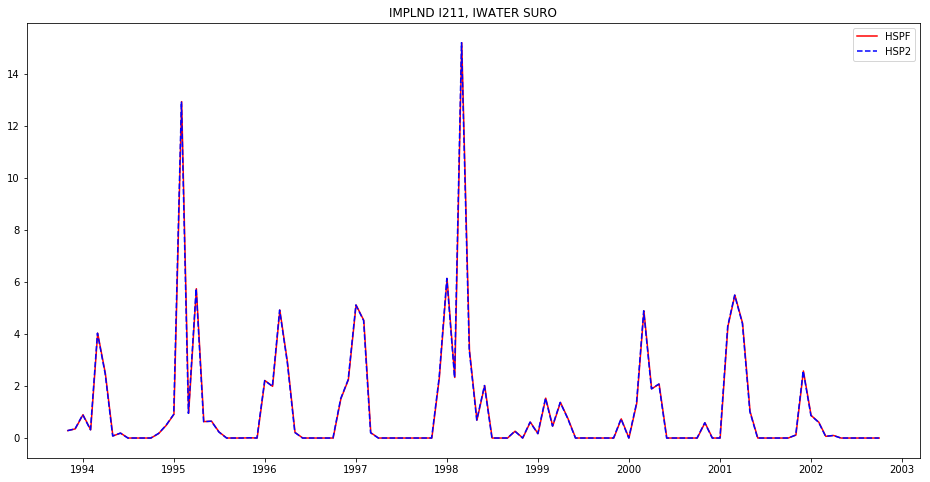

In [21]:
hspf, hsp2 = imp(ils, 'SURO', 'sum')

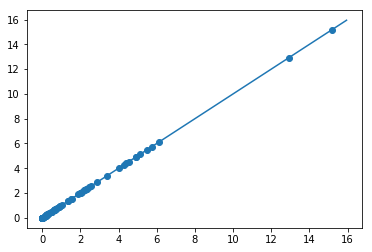

In [22]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### IMPLND IWATER IMPEV, Monthly

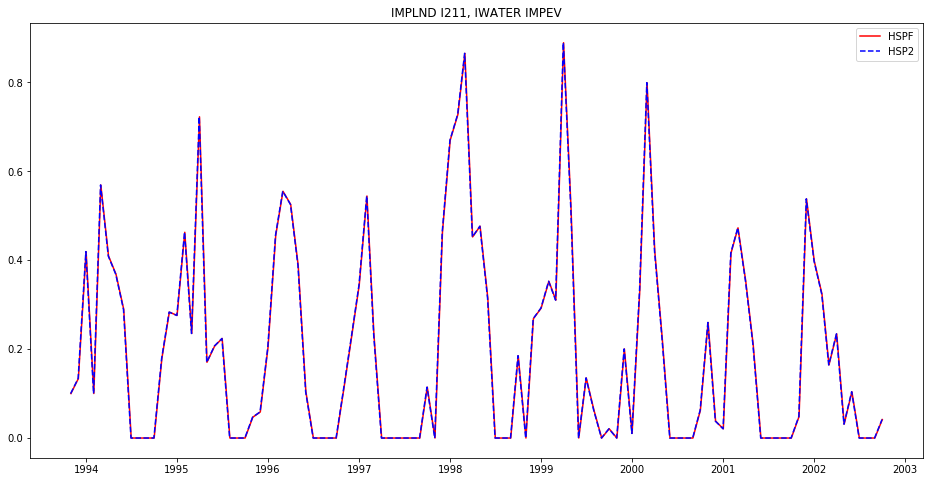

In [23]:
hspf, hsp2 = imp(ils, 'IMPEV')

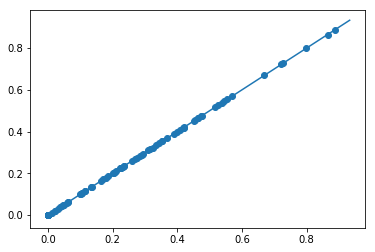

In [24]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### IMPLND IWATER PET, Monthly

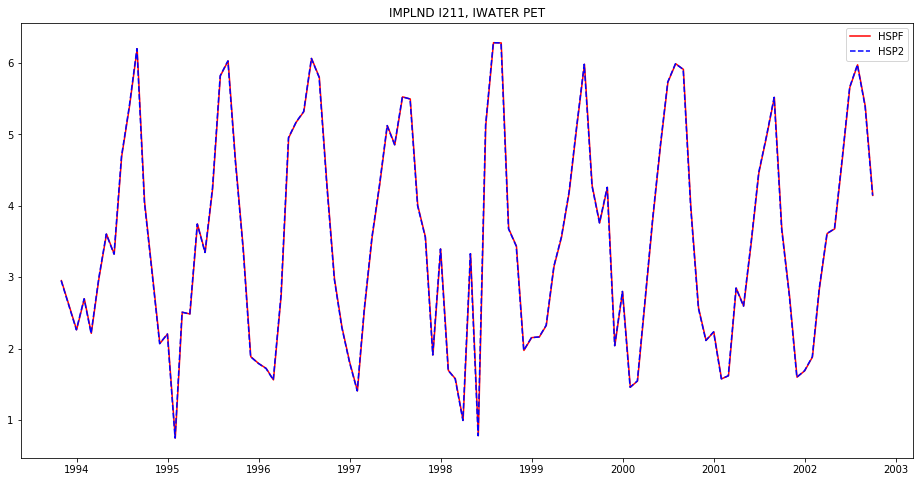

In [25]:
hspf, hsp2 = imp(ils, 'PET')

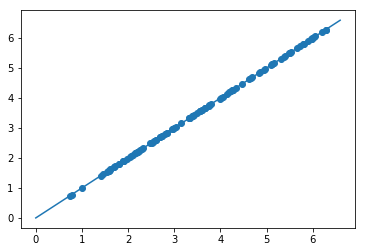

In [26]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### IMPLND IWATER RETS, Monthly

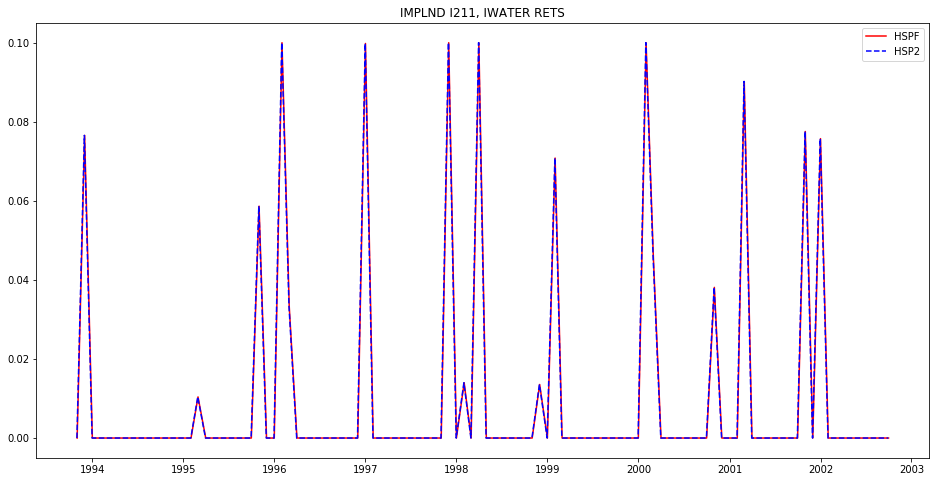

In [27]:
hspf, hsp2 = imp(ils, 'RETS', 'last')

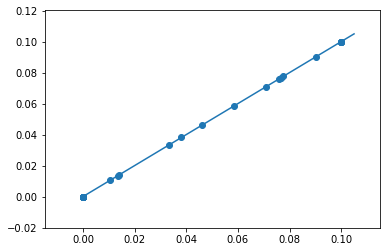

In [28]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### IMPLND IWATER SUPY, Monthly

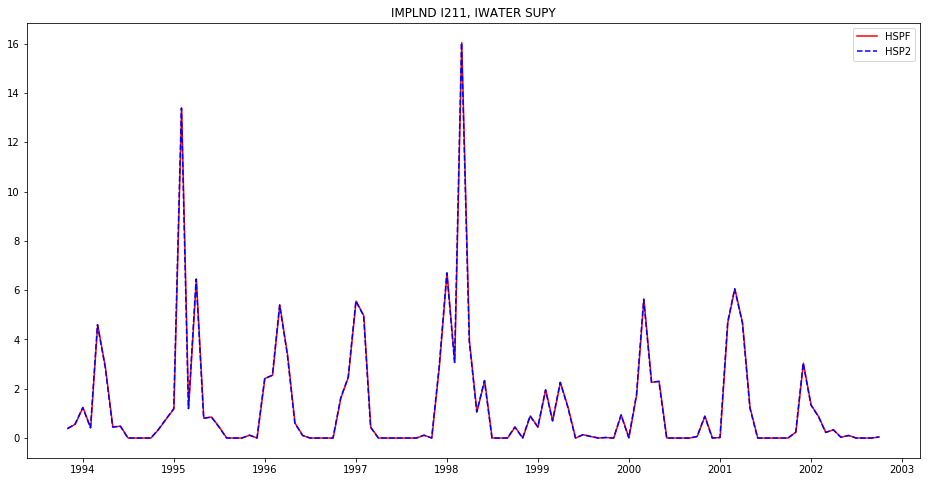

In [29]:
hspf, hsp2 = imp(ils, 'SUPY')

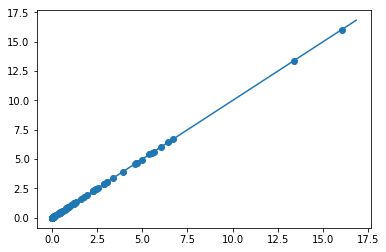

In [30]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### IMPLND IWATER SURS, Monthly

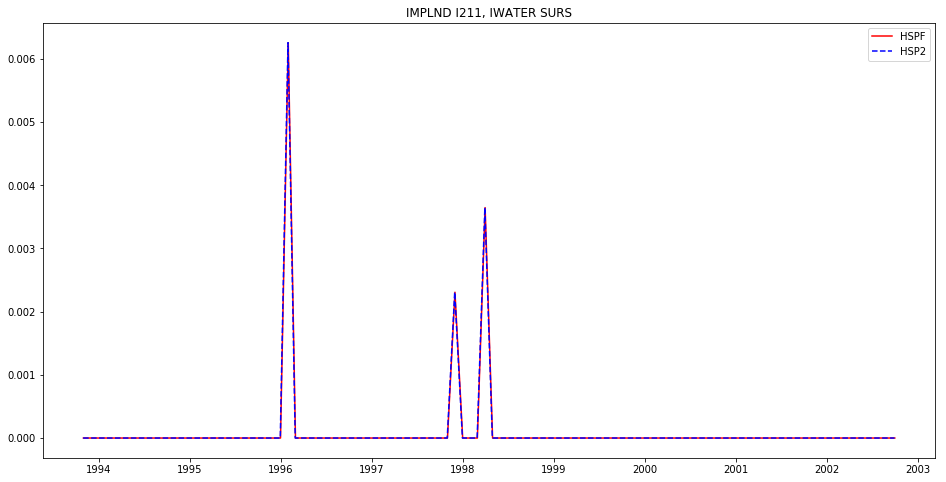

In [31]:
hspf, hsp2 = imp(ils, 'SURS', 'last')

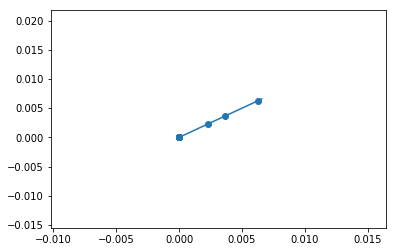

In [32]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

## Automate checking PERLNDs for PERO

In [33]:
# With Large HBNs this currently takes a while (need to speed up the HBN Read)
segments = []
for operation,segment,optype,variable,freq in keys:
    if str(operation)=='PERLND' and str(optype)=='PWATER' and str(variable)=='PERO' and freq==4:
        segments.append(str(segment))

dfperlnd = pd.DataFrame()
for seg in segments:  
    path = 'PERLND,' + seg + ',PWATER,PERO'
    hspf, units_flag = HSP2tools.get_HBNdata(hbnname, path)
    hspf = hspf['M'].values
        
    path =  'RESULTS/PERLND' +  '_P' + '{:0>3s}'.format(str(seg)) + '/PWATER'   
    hsp2 = pd.read_hdf(hdfname, path)['PERO']
    hsp2 = hsp2.resample('M').sum().values
    
    dfperlnd.at[seg, 'Max Diff'] =  (hspf - hsp2).max()
    dfperlnd.at[seg, 'Sum of HSPF'] = hspf.sum()
    dfperlnd.at[seg, 'Sum of HSP2'] = hsp2.sum()
    dfperlnd.at[seg, '%diff of Sum'] = 100.0 * (hspf.sum() - hsp2.sum()) / hspf.sum()
    dfperlnd.at[seg, 'abs(%diff of Sum)'] = 100.0 * abs(hspf.sum() - hsp2.sum()) / hspf.sum()

dfperlnd = dfperlnd.sort_values(by=['abs(%diff of Sum)'])    
dfperlnd

A Jupyter Widget

In [34]:
dfperlnd['%diff of Sum'].describe()

A Jupyter Widget

The PERLND segments are ordered in assending "abs(%diff of Sum)", so the last entry is the worst case (by this measure.)

In [35]:
pls = dfperlnd.index[-1]
print 'WORST PERLND SEGMENT IS', pls
print '%diff of the total PERO sum of', dfperlnd.loc[pls,'%diff of Sum']

WORST PERLND SEGMENT IS 101
%diff of the total PERO sum of 0.0128203408491


### Define routine to read HSPF and HSP2 data and plot together

In [36]:
def per(pls, name, how='sum'):
    # Use Tim Cera's HBN reader to get the HSPF data  
    path = 'PERLND,' + str(pls) + ',PWATER,' + name
    hspf, units_flag = HSP2tools.get_HBNdata(hbnname, path)
    # There may be both monthly and annual timeseries available. Get the monthly timeseries.
    hspf = hspf['M']
    
    # Now read the corresponding HSP2 data and comvert to monthly
    path = '/RESULTS/PERLND' +  '_P' + '{:0>3s}'.format(str(pls)) + '/PWATER'
    if how == 'sum':
        hsp2 = pd.read_hdf(hdfname, path)[name].resample('M').sum()
    elif how == 'last':
        hsp2 = pd.read_hdf(hdfname, path)[name].resample('M').last()
    
    plt.figure(figsize=(16,8))
    plt.plot(hspf.index, hspf, label='HSPF', color='r')
    plt.plot(hsp2.index, hsp2, label='HSP2', color='b', linestyle='--')
    plt.legend()
    plt.title('PERLND ' + 'P' + '{:0>3s}'.format(str(pls))+ ', PWATER ' +  name)
    
    return hspf, hsp2

#### PERLND PWATER AGWO

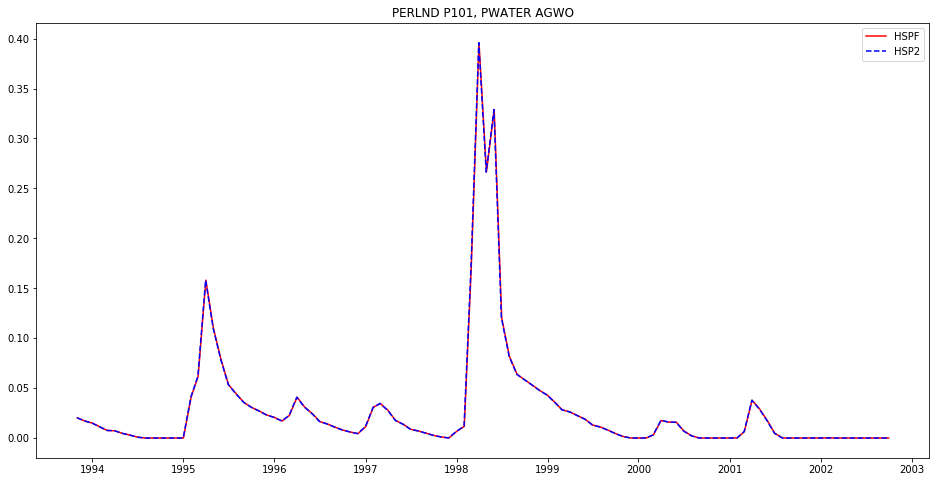

In [37]:
hspf, hsp2 = per(pls, 'AGWO')

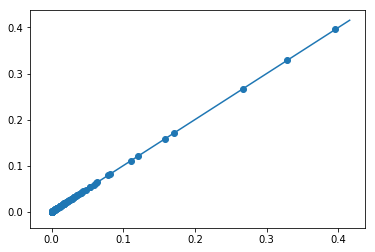

In [38]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER BASET

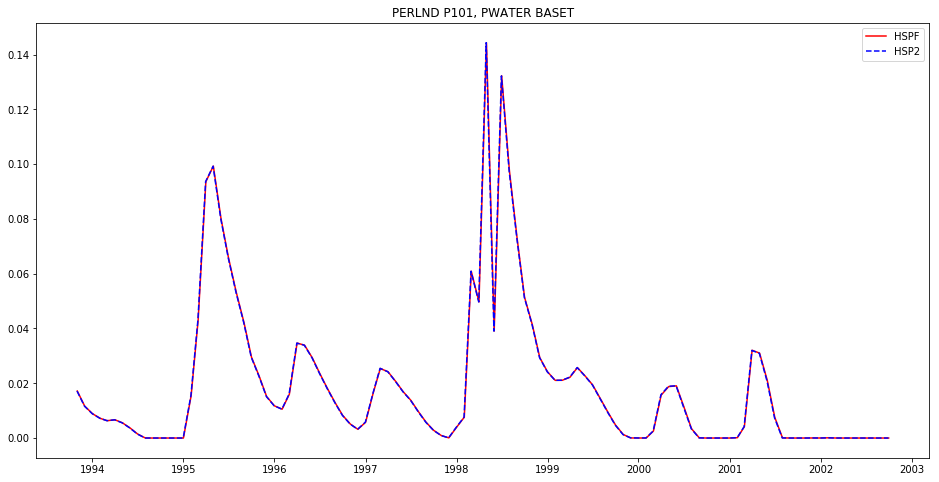

In [39]:
hspf, hsp2 = per(pls, 'BASET')

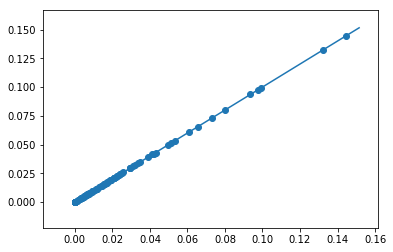

In [40]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

##### PERLND PWATER CEPE

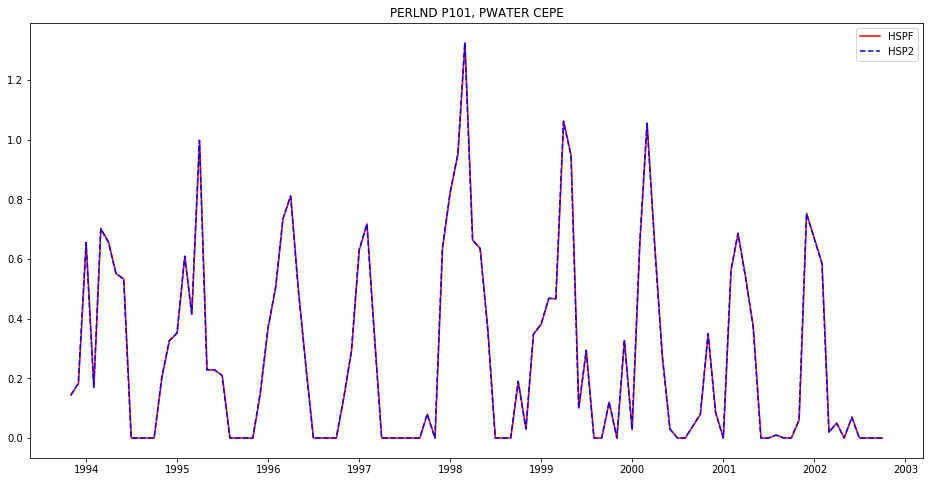

In [41]:
hspf, hsp2 = per(pls, 'CEPE')

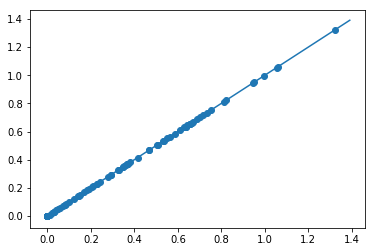

In [42]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER IFWI

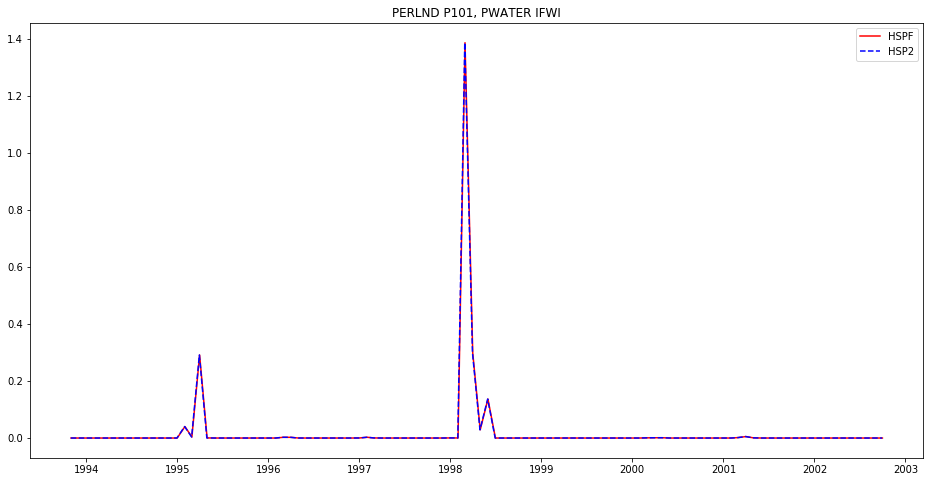

In [43]:
hspf, hsp2 = per(pls, 'IFWI')

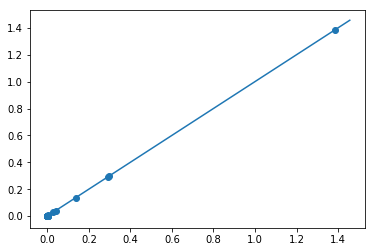

In [44]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER IFWO

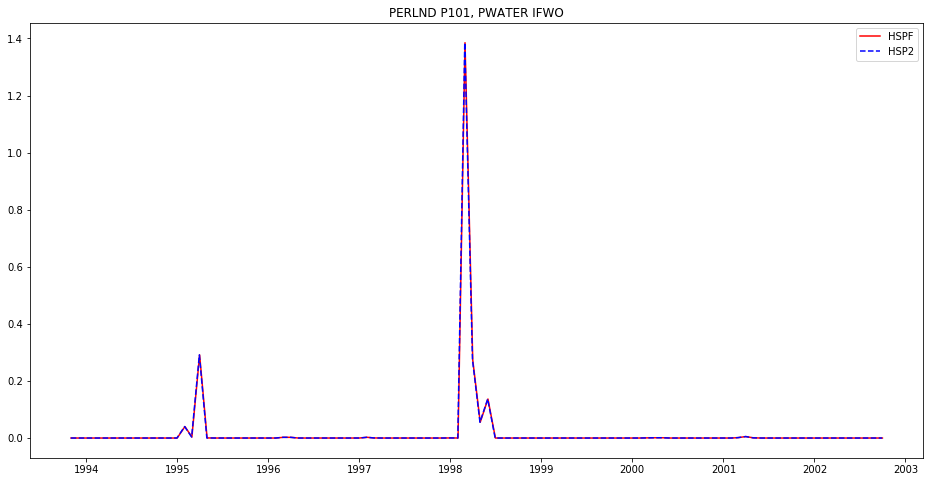

In [45]:
hspf, hsp2 = per(pls, 'IFWO')

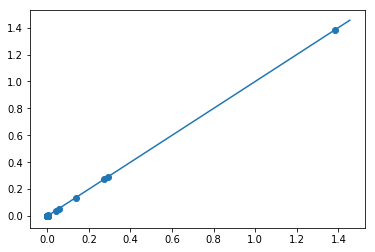

In [46]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER IGWI

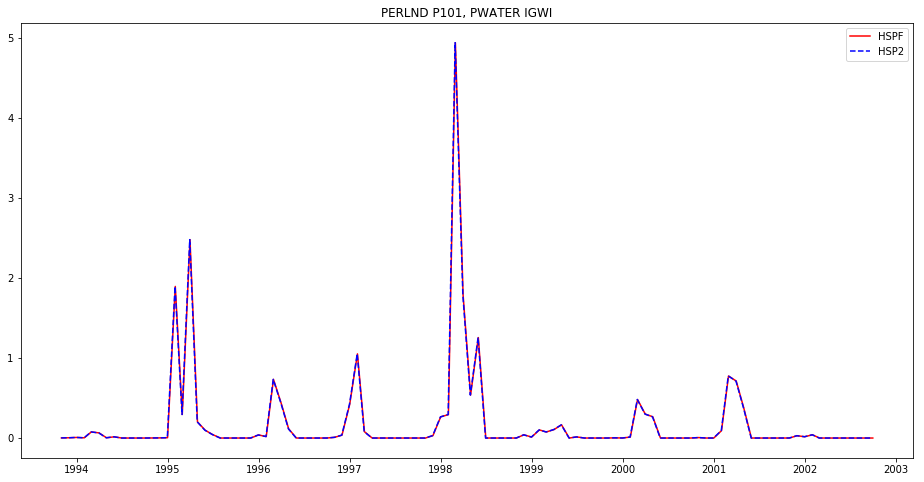

In [47]:
hspf, hsp2 = per(pls, 'IGWI')

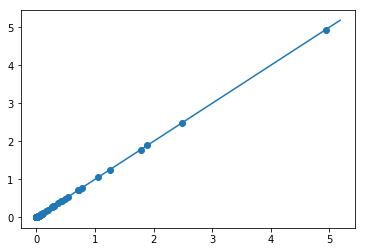

In [48]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER INFIL

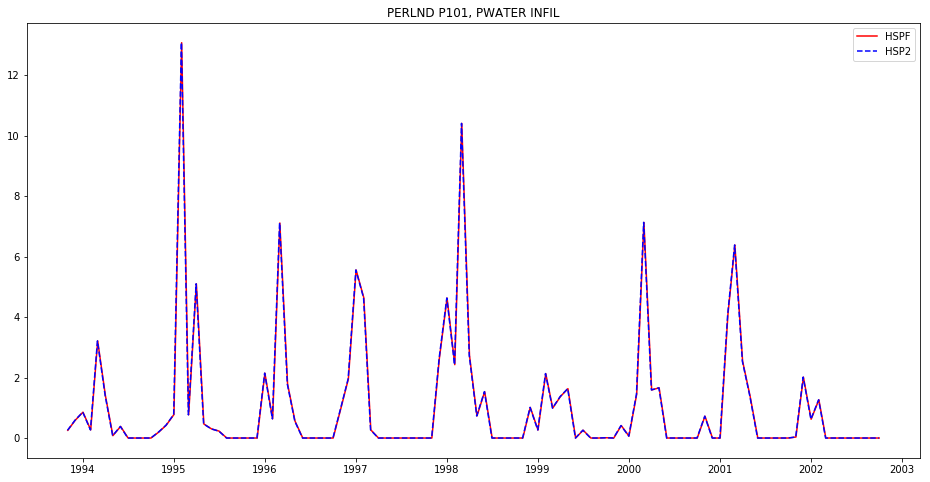

In [49]:
hspf, hsp2 = per(pls, 'INFIL')

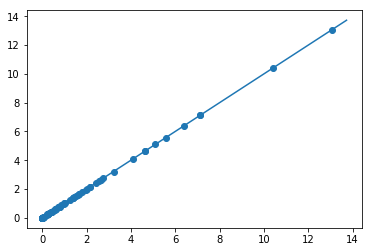

In [50]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER LZET

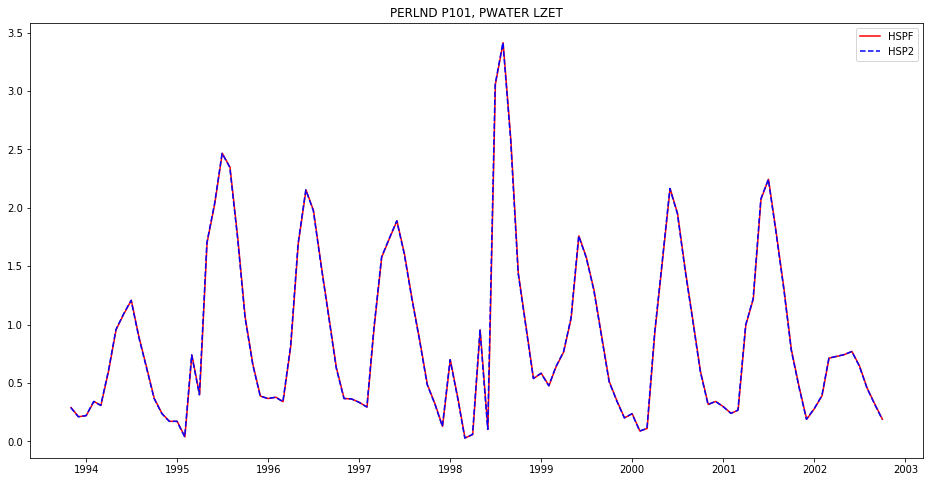

In [51]:
hspf, hsp2 = per(pls, 'LZET')

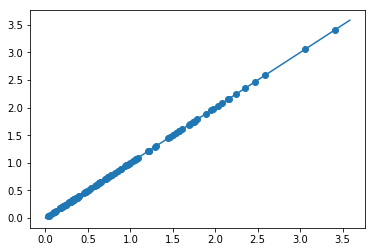

In [52]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER PERC

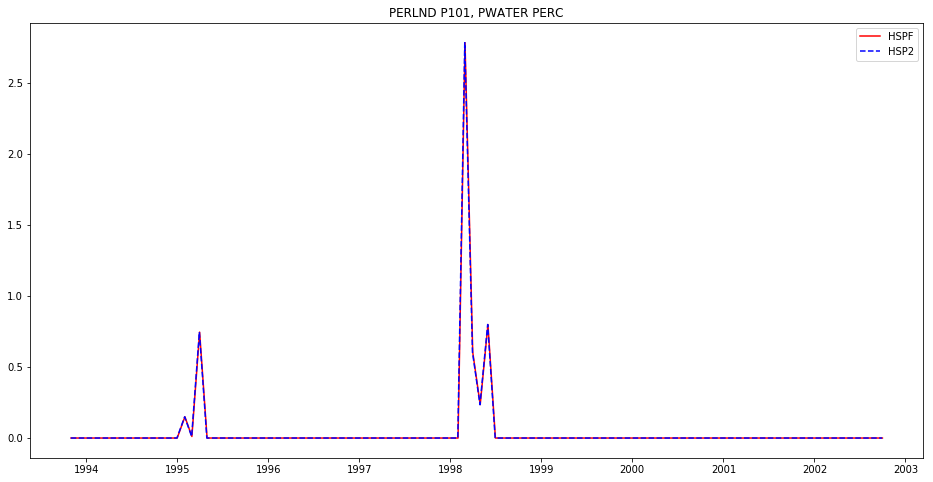

In [53]:
hspf, hsp2 = per(pls, 'PERC')

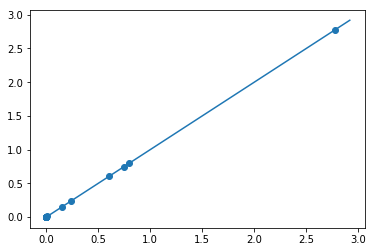

In [54]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER PERO

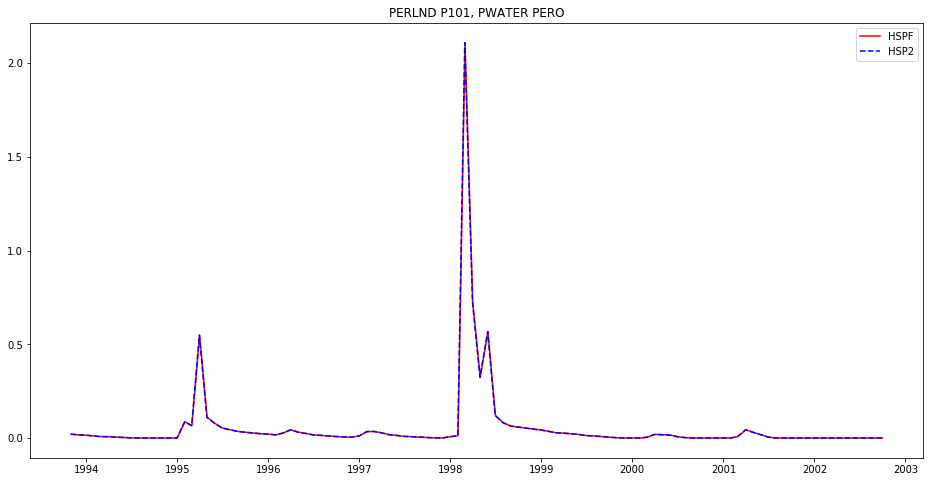

In [55]:
hspf, hsp2 = per(pls, 'PERO')

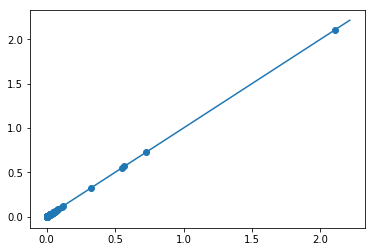

In [56]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER PERS

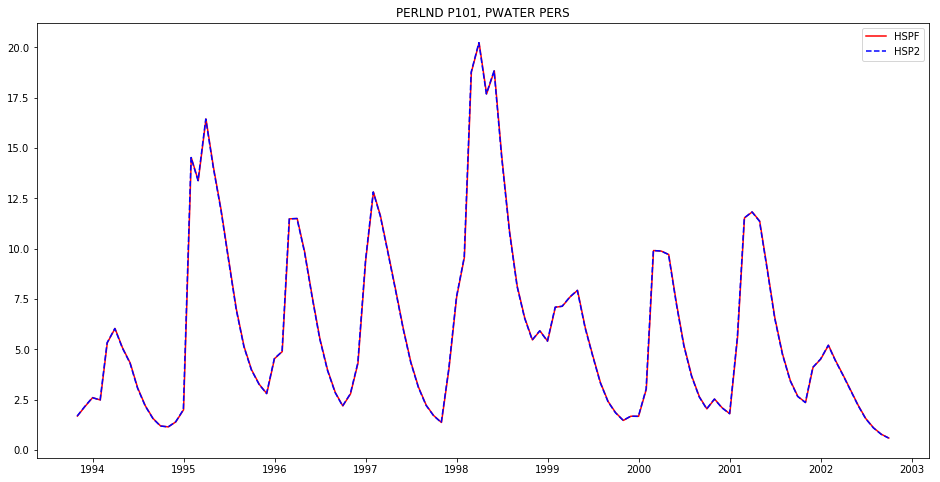

In [57]:
hspf, hsp2 = per(pls, 'PERS', 'last')

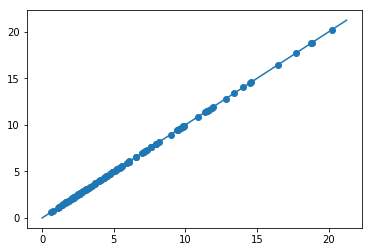

In [58]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER PET

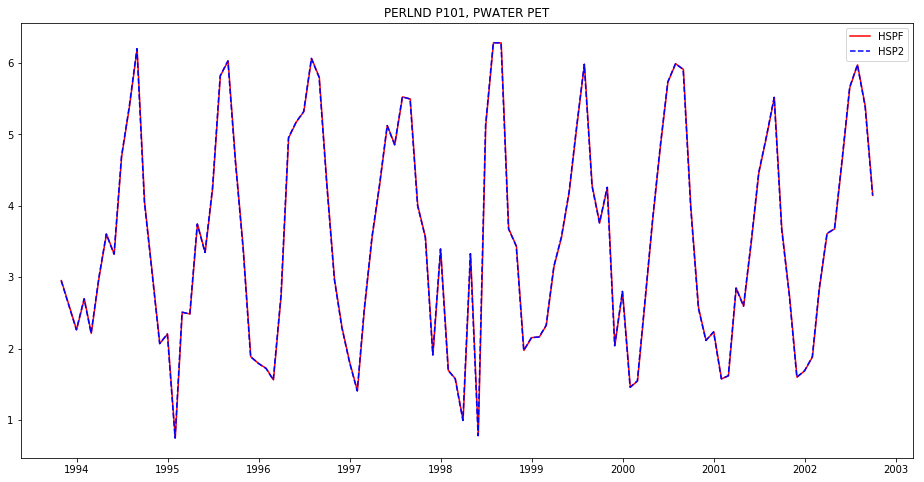

In [59]:
hspf, hsp2 = per(pls, 'PET')

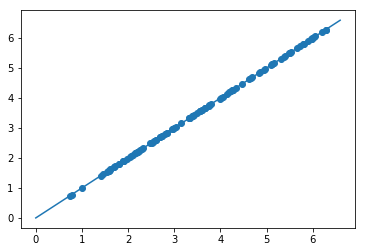

In [60]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER SUPY

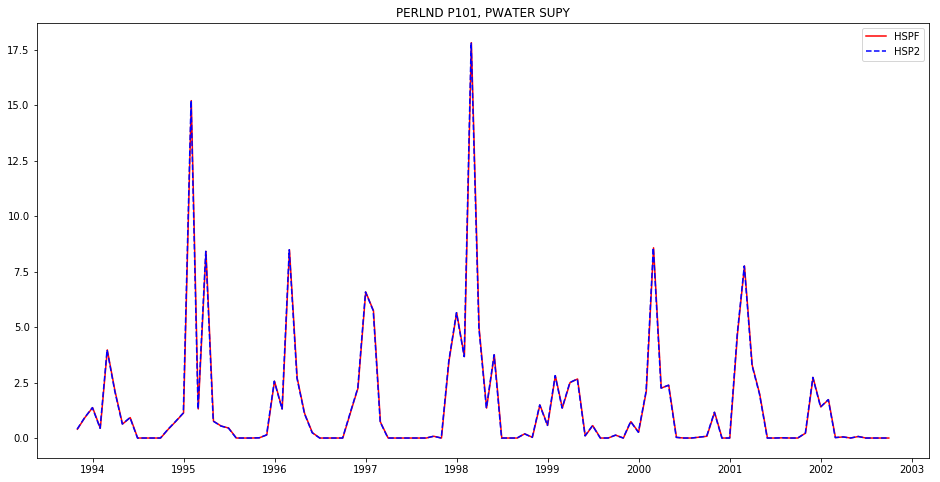

In [61]:
hspf, hsp2 = per(pls, 'SUPY')

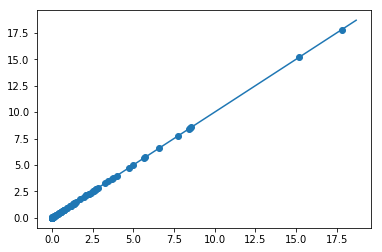

In [62]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER SURO

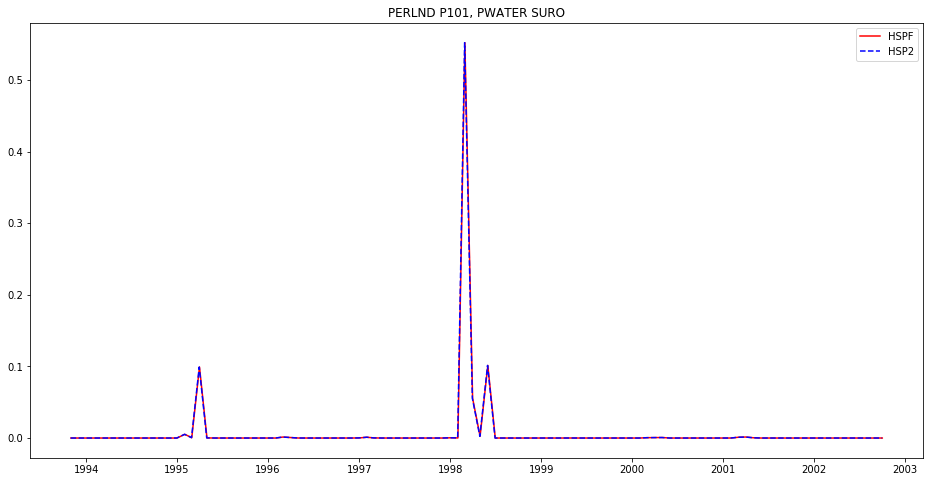

In [63]:
hspf, hsp2 = per(pls, 'SURO')

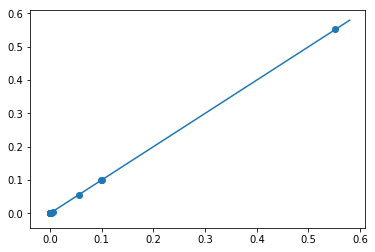

In [64]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER TAET

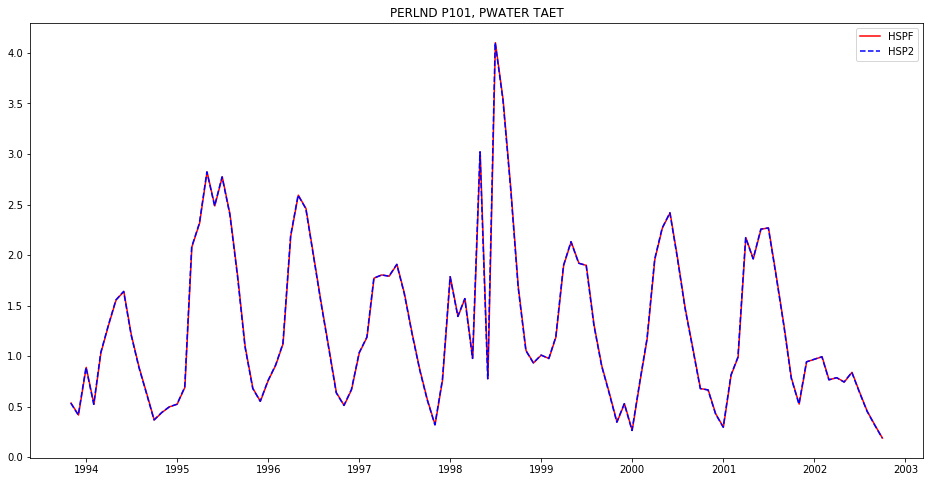

In [65]:
hspf, hsp2 = per(pls, 'TAET')

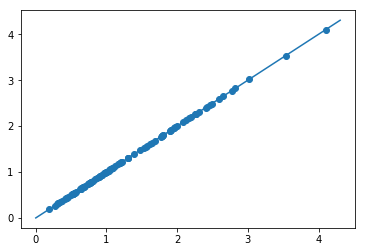

In [66]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER UZET

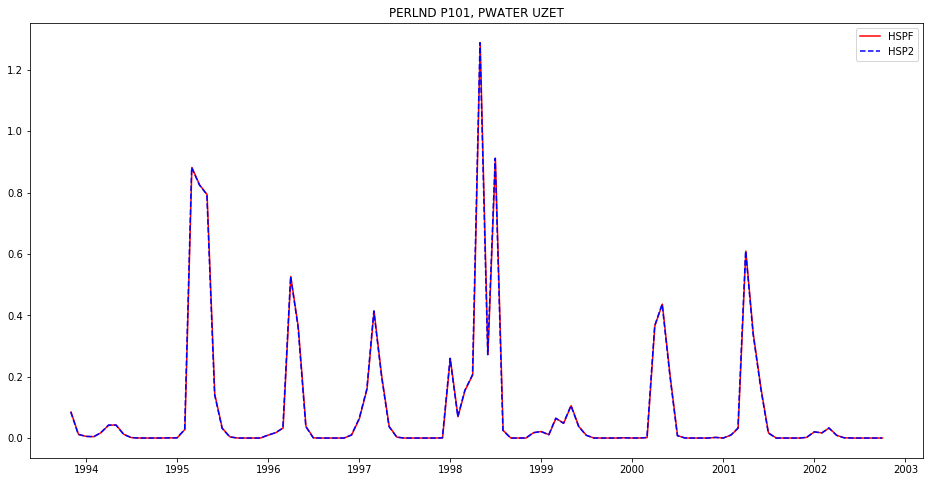

In [67]:
hspf, hsp2 = per(pls, 'UZET')

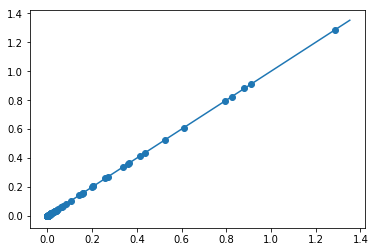

In [68]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### PERLND PWATER UZI

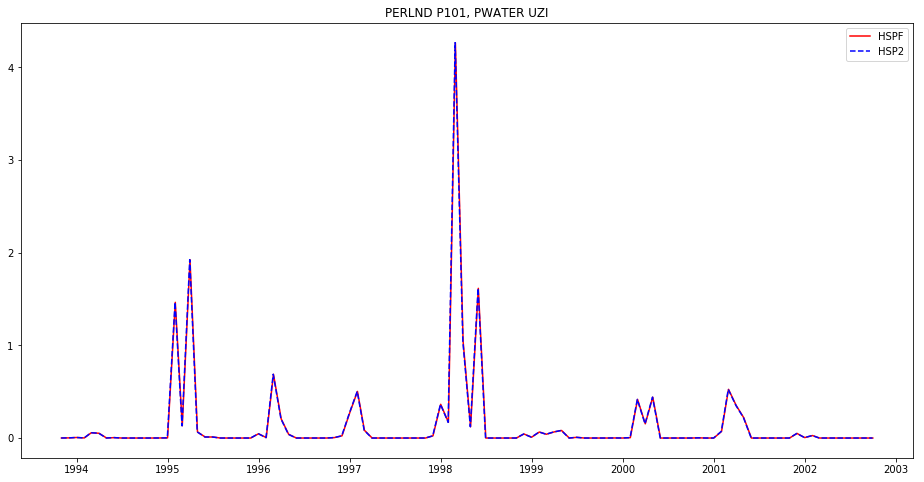

In [69]:
hspf, hsp2 = per(pls, 'UZI')

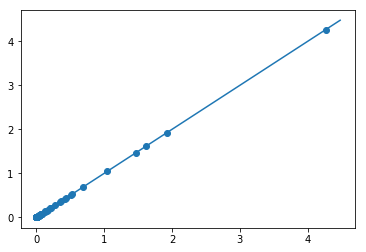

In [70]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

## RCHRES

### Automate checking RCHRESs for ROVOL

In [71]:
# With Large HBNs this currently takes a while (need to speed up the HBN Read)
segments = []
for operation,segment,optype,variable,freq in keys:
    if str(operation)=='RCHRES' and str(optype)=='HYDR' and str(variable)=='ROVOL' and freq==4:
        segments.append(str(segment))

dfrchres = pd.DataFrame()
for seg in segments:  
    string = 'RCHRES,' + seg + ',HYDR,ROVOL'
    hspf, units_flag = HSP2tools.get_HBNdata(hbnname, string)
    hspf = hspf['M'].values
      
    string = 'RESULTS/RCHRES'+   '_R' + '{:0>3s}'.format(str(seg)) +'/HYDR' 
    hsp2 = pd.read_hdf(hdfname, string)['ROVOL']
    hsp2 = hsp2.resample('M').sum().values
    
    dfrchres.at[seg, 'Max Diff'] =  (hspf - hsp2).max()
    dfrchres.at[seg, 'Sum of HSPF'] = hspf.sum()
    dfrchres.at[seg, 'Sum of HSP2'] = hsp2.sum()
    dfrchres.at[seg, '%diff of Sum'] = 100.0 * (hspf.sum() - hsp2.sum()) / hspf.sum()
    dfrchres.at[seg, 'abs(%diff of Sum)'] = 100.0 * abs(hspf.sum() - hsp2.sum()) / hspf.sum()    

dfrchres = dfrchres.sort_values(by=['abs(%diff of Sum)'])      
dfrchres

A Jupyter Widget

In [73]:
dfrchres['%diff of Sum'].describe()

A Jupyter Widget

The RCHRES segments are ordered in assending "abs(%diff of Sum)", so the last entry is the worst case (by this measure.)

In [75]:
rid = dfrchres.index[-1]
print 'WORST RCHRES SEGMENT IS', rid
print '%diff of the total ROVOL sum of', dfrchres.loc[rid,'%diff of Sum']

WORST RCHRES SEGMENT IS 225
%diff of the total ROVOL sum of 0.0204781875003


### Define routine to read HSPF and HSP2, plot together for RCHRES

In [76]:
def rch(rid, name, how='sum'):
    # Use Tim Cera's HBN reader to get the HSPF data  
    path = 'RCHRES,' + str(rid) + ',HYDR,' + name
    hspf, units_flag = HSP2tools.get_HBNdata(hbnname, path)
    # There may be both monthly and annual timeseries available. Get the monthly timeseries.
    hspf = hspf['M']
    
    # Now read the corresponding HSP2 data and comvert to monthly
    path = '/RESULTS/RCHRES' +   '_R' + '{:0>3s}'.format(str(rid)) + '/HYDR'
    if how == 'sum':
        hsp2 = pd.read_hdf(hdfname, path)[name].resample('M').sum()
    elif how == 'last':
        hsp2 = pd.read_hdf(hdfname, path)[name].resample('M').last()
    
    plt.figure(figsize=(16,8))
    plt.plot(hspf.index, hspf, label='HSPF', color='r')
    plt.plot(hsp2.index, hsp2, label='HSP2', color='b', linestyle='--')
    plt.legend()
    plt.title('RCHRES ' +   'R' + '{:0>3s}'.format(str(rid)) + ', HYDR ' +  name)
    
    return hspf, hsp2

#### RCHRES HYDR IVOL

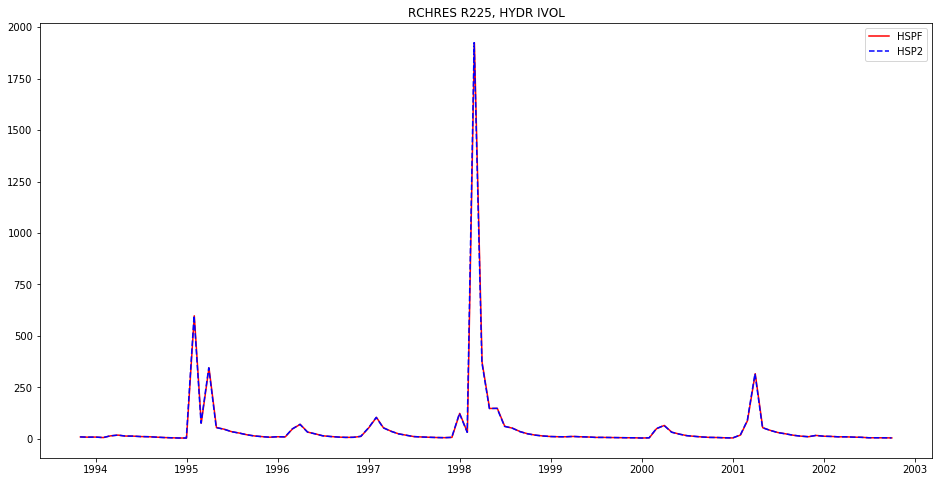

In [77]:
hspf, hsp2 = rch(rid, 'IVOL')

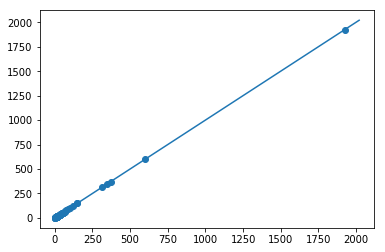

In [78]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### RCHRES HYDR PRSUPY

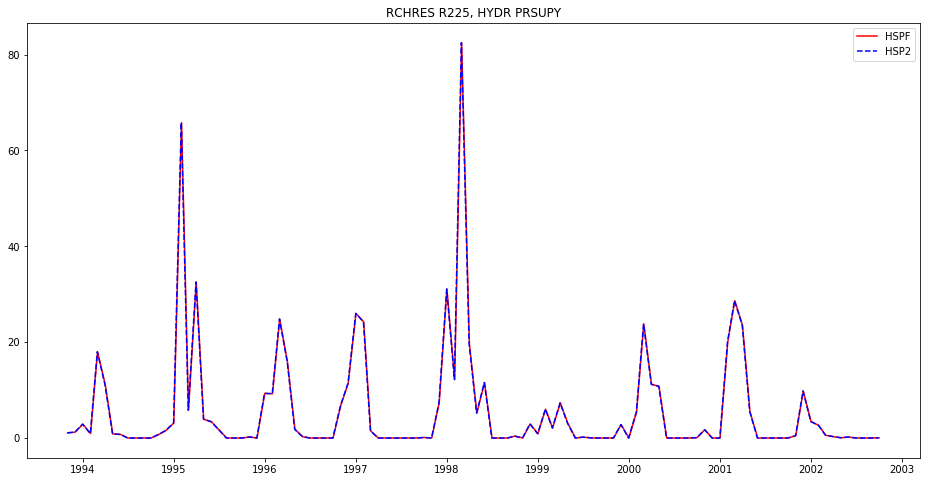

In [79]:
hspf, hsp2 = rch(rid, 'PRSUPY')

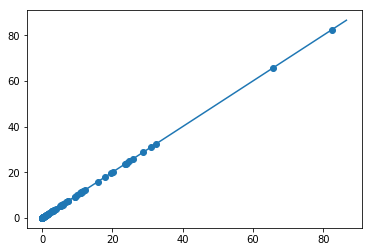

In [80]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### RCHRES HYDR ROVOL

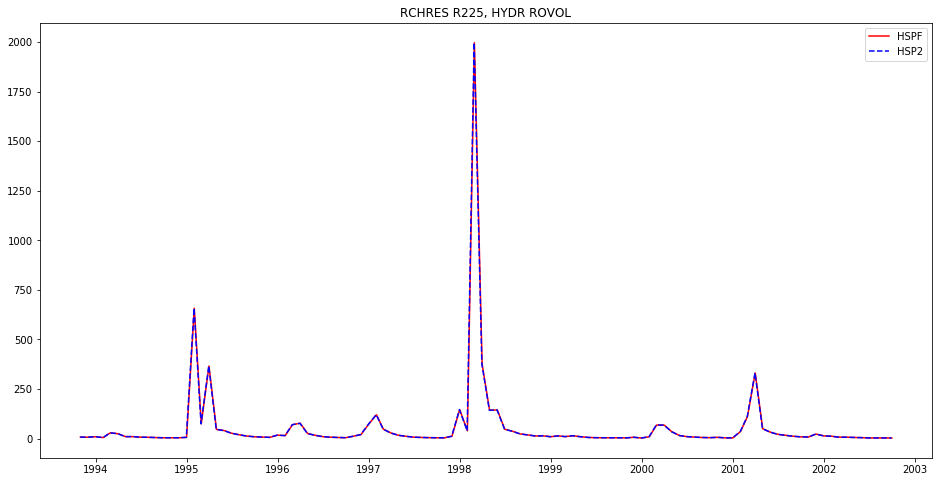

In [81]:
hspf, hsp2 = rch(rid, 'ROVOL')

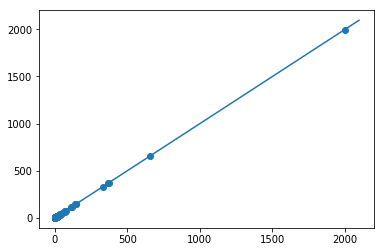

In [82]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### RCHRES HYDR VOL

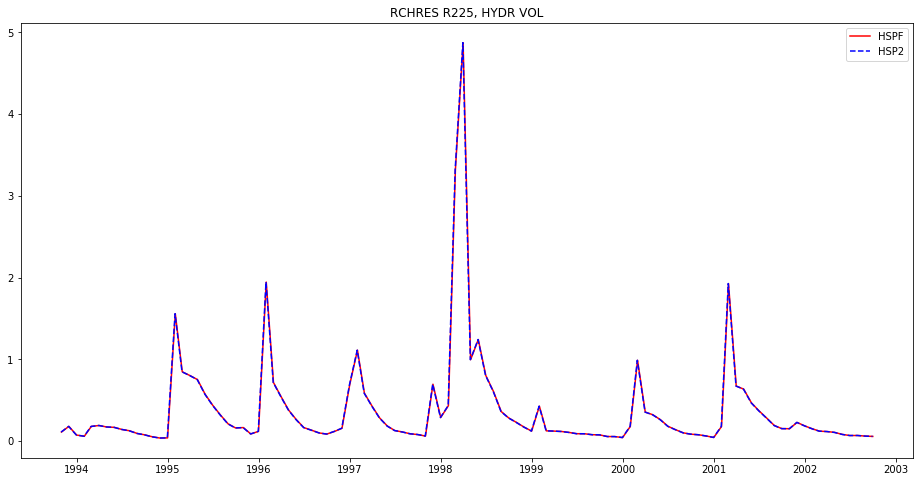

In [83]:
hspf, hsp2 = rch(rid, 'VOL', 'last')

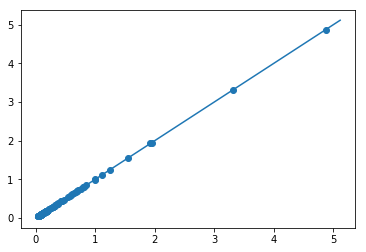

In [84]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])

#### RCHRES HYDR VOLEV

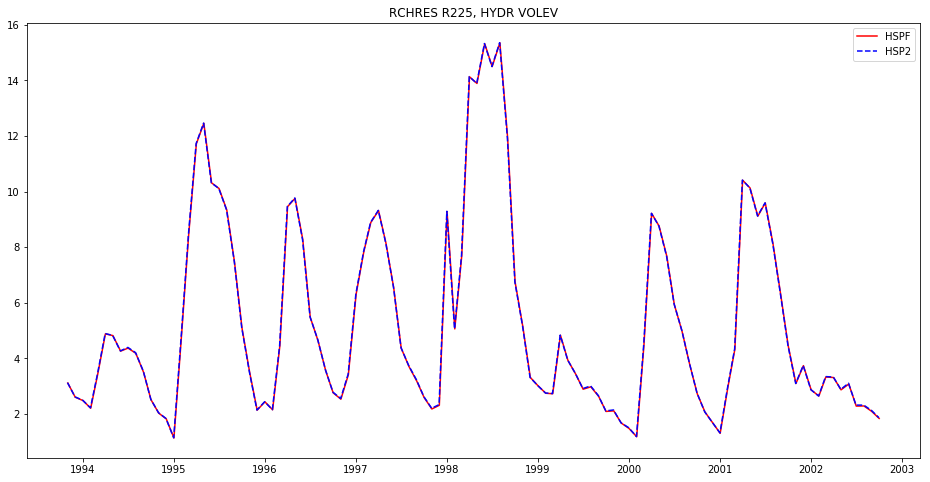

In [85]:
hspf, hsp2 = rch(rid, 'VOLEV')

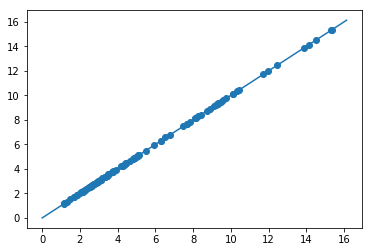

In [86]:
plt.scatter(hspf, hsp2)
top = 1.05 * max(hspf.max(), hsp2.max())
plt.plot([0.0, top], [0.0, top])